This notebook is a first exploration of the Jacob 2017 data.

Specifically, we'll:

- do some basic OTU table checks: number of OTUs per sample, number of OTUs shared between people, number of reads per sample, etc
- plot alpha diversity by donor/patient and also by remission/no response status
- make a PCoA plot and see if the donors (6 FMPs, each used at least 3 times) separate out

If the donors don't separate out, we'll need to ask the authors for this mapping info, though only maybe - we don't *actually* need it since we know which donor went to which patient. It would make any stats that we do cleaner, but hey whatevs. If the FMPs are different enough then are we really worried about the lack of independence...

In [101]:
import pandas as pd
import numpy as np
import skbio.diversity.alpha as alph
from skbio.diversity import beta_diversity 

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('white')

In [61]:
fotu = '../../data/qiime-proc/jacob2017/exported_data/jacob2017.feature-table.txt'
ftaxa = '../../data/qiime-proc/jacob2017/exported_data/jacob2017.taxonomy.tsv'
fmeta = '../../data/clean/jacob2017.metadata.txt'

In [62]:
df = pd.read_csv(fotu, sep='\t', skiprows=1, index_col=0).T
df.head()

#OTU ID,355281665bb16bf1045de9cf09b44711,fb9fff85b91dae8de2154b82cd2ca4b5,18f4f0fa87b2d71da0960a0a97789d8a,6b0b8441595e1addeb4f99104145712d,7fba824db92f5ec74a3eec738f374f71,9e73856f26c3a8c3119f0bb36249b524,56b419956017b04c1fd0898b14dcf7a2,a18fdc1fdfb0be4223154df4b53c145f,e1140a33439fc1f589edc6c3e4e4856f,7be3fed5631db826c499e1f0f3d5bff1,...,f07600a7d3f0fff2a981e0bfdba5236b,1546dfe8807a5b526cc1f7168ad4245b,9510ccdb8a2b32b60b67dfbfb0401831,2eb10fa13943cf2c62ed4294eefd056b,9eaa86f2d82d3e1e6387c2f3dac18369,e1e272692c4c52afff17b521b23f704a,a0ba0ecc67d3def671fd2ad514f30b16,6f1ad7d4fb001ed00344b8ff1d8e5df8,c5a9d829abde66be40e280f26a112cc0,314afd8bfc50b3cea8d52dd35c2e995b
SRR5629110,13149.0,5156.0,2394.0,2212.0,1281.0,1113.0,1031.0,839.0,806.0,804.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR5629162,0.0,562.0,3938.0,0.0,0.0,876.0,21.0,0.0,667.0,153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR5629141,0.0,230.0,0.0,0.0,70.0,1243.0,111.0,1204.0,2050.0,888.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR5629092,0.0,186.0,1.0,0.0,1115.0,1991.0,1158.0,1482.0,0.0,2385.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR5629118,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
meta = pd.read_csv(fmeta, sep='\t')
meta.head()

,run_accession,patient_id,sample_id,sample_type,remission_w4,response_w4,sample_title,study_accession,secondary_study_accession,sample_accession,...,sra_aspera,sra_galaxy,cram_index_ftp,cram_index_aspera,cram_index_galaxy,sample_alias,broker_name,nominal_sdev,first_created,Patient
0,SRR5629088,1,donor,donor,No,No,Longman.FMT.001.Donor.Pool253.Integrated,PRJNA388210,SRP108284,SAMN07173004,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR562/008/SRR562...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/008/SRR5629088,NaN,NaN,NaN,Longman.FMT.001.Donor.Pool253.Integrated,NaN,NaN,2017-11-09,1
1,SRR5629096,1,W2,patient,No,No,Longman.FMT.001.W2.Pool253.Integrated,PRJNA388210,SRP108284,SAMN07172996,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR562/006/SRR562...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/006/SRR5629096,NaN,NaN,NaN,Longman.FMT.001.W2.Pool253.Integrated,NaN,NaN,2017-11-09,1
2,SRR5629135,1,W4,patient,No,No,Longman.FMT.001.W4.Pool253.Integrated,PRJNA388210,SRP108284,SAMN07173013,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR562/005/SRR562...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/005/SRR5629135,NaN,NaN,NaN,Longman.FMT.001.W4.Pool253.Integrated,NaN,NaN,2017-11-09,1
3,SRR5629089,7,W2,patient,No,No,Longman.FMT.007.W2.Pool253.Integrated,PRJNA388210,SRP108284,SAMN07173005,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR562/009/SRR562...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/009/SRR5629089,NaN,NaN,NaN,Longman.FMT.007.W2.Pool253.Integrated,NaN,NaN,2017-11-09,7
4,SRR5629094,7,W4,patient,No,No,Longman.FMT.007.W4.Pool253.Integrated,PRJNA388210,SRP108284,SAMN07173016,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR562/004/SRR562...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/004/SRR5629094,NaN,NaN,NaN,Longman.FMT.007.W4.Pool253.Integrated,NaN,NaN,2017-11-09,7


In [64]:
[i for i in meta['run_accession'] if i not in df.index]

[]

In [65]:
[i for i in df.index if i not in meta['run_accession'].values]

[]

Good, all samples in the OTU table map to the metadata.

# OTU table checks

- How many reads per sample?
- How many OTUs per sample? Per person?
- How many OTUs are unique to each sample? Person? (x-axis = N people, y-axis=N OTUs)

### Reads per sample

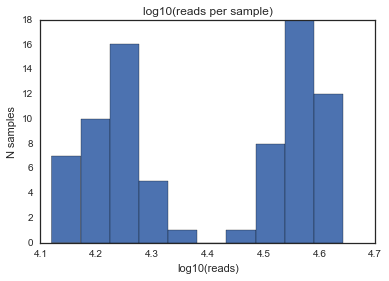

In [66]:
df.sum(axis=1).apply(np.log10).plot(kind='hist')
plt.title('log10(reads per sample)')
plt.xlabel('log10(reads)')
plt.ylabel('N samples')

In [67]:
10**4.2, 10**4.4, 10**4.55

(15848.93192461114, 25118.864315095823, 35481.33892335753)

Hm, weird. Bimodal distribution of read counts, with one group centered at 15,000 and one at 35,000 reads per sample. I think this should be okay (below 10,000 reads is when I start to get worried), but we should keep this in mind. Let's make sure to check PCA, alpha diversity, etc with respect to read counts too.

#### Add total reads to metadata

In [68]:
sample_reads = df.sum(axis=1)
sample_reads.index.name = 'run_accession'
sample_reads = sample_reads.reset_index(name='total_reads')
meta = pd.merge(meta, sample_reads)

### OTUs per sample

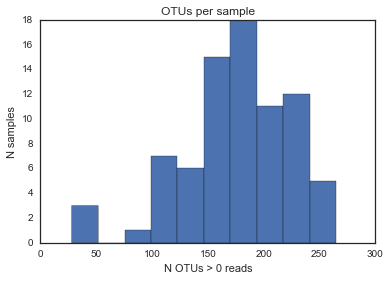

In [69]:
(df > 0).sum(axis=1).plot(kind='hist')
plt.title('OTUs per sample')
plt.xlabel('N OTUs > 0 reads')
plt.ylabel('N samples')

This is a bit lower than the Kump dataset, but looks okay to me!

### OTUs per patient

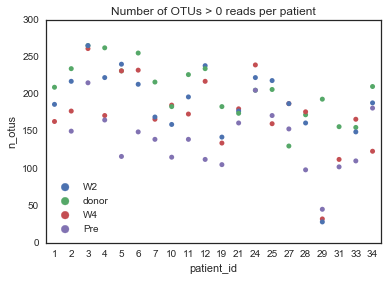

In [78]:
sns.stripplot(
    data=((df > 0)
        .sum(axis=1)
        .reset_index(name='n_otus')
        .rename(columns={'index': 'run_accession'})
        .merge(meta, left_on='run_accession', right_on='run_accession')
     ),
    x='patient_id',
    y='n_otus',
    hue='sample_id'
)
plt.legend(loc='lower left')
plt.title('Number of OTUs > 0 reads per patient')

Yep, this looks good too. Notice that the "Pre" sample is pretty consisently the lowest for each patient - this makes sense, since pre-FMT they've gotten antibiotics. And in many patients, the donor is also higher than the patient.

### OTUs shared across people


In [74]:
lst_nonzero = []
for g, subdf in meta.groupby(['patient_id', 'sample_type']):
    # Indicated whether we're looking at donor or patient
    if g[1] == 'donor':
        newid = str(g[0]) + '_d'
    else:
        newid = str(g[0]) + '_pt'
    tmp = pd.DataFrame((df.loc[subdf['run_accession']] > 0).sum(), columns=['n_samples_nonzero'])
    tmp['id'] = newid
    lst_nonzero.append(tmp)

In [76]:
# This dataframe has individual people (patientID + donor/pt suffix) in rows,
# OTUs in columns, and the number of samples that OTU was nonzero in that patient
df_nonzero = pd.concat(lst_nonzero).reset_index().pivot(index='id', columns='#OTU ID', values='n_samples_nonzero')
df_nonzero.head()

#OTU ID,000c913fe032c24d1ff79d4c2e331596,00243c36a138eef92e529e13ed93bdc8,0058aff8ea94822abde1995feaa24ba0,00a1cc6a322d780dab03ca412a8c865a,00b20d53628ea0ed69cc21061e6930d8,00c3246d0d94de33eb9c66667b8e9438,015834bf2926485d2c2729c424118c77,019785228c5551efd5633fc9a877b815,021227423af311c933e2738c6ba424de,0262a01c60f009cde412c627f097eb2a,...,fd7dc37bcd9987ac058ff5c1dcb48993,fe32db9ffcb3b682ddc6fcb94d8e2932,fe794b980b3c50f505fba0bf2b892eb6,fee7ac870262b24ce7fdffd728b062af,ff000622710ca7e354094e01be6d7a9f,ff45aeff055c6e69bb68f94621141a43,ff6a09321edf3d7dff69b51ea00ffd43,ff6cab468fa3755a3e385fd2c404215e,ff7aba6f35ff041dc61362a4608cbf4c,ffb38f3f3b2d7dc134be6b96c17fa06e
id,,,,,,,,,,,,,,,,,,,,,
10_d,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10_pt,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11_d,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11_pt,0,0,0,0,3,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
12_d,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0


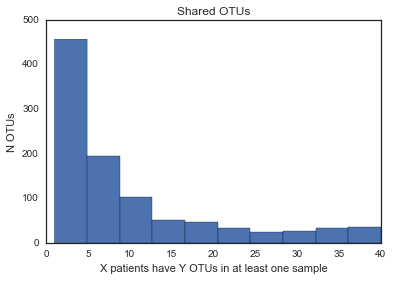

In [77]:
# Number of patients each OTU is present in
(df_nonzero > 0).sum().plot(kind='hist')
plt.title('Shared OTUs')
plt.xlabel('X patients have Y OTUs in at least one sample')
plt.ylabel('N OTUs')

Interesting - that's a much fatter tail than I would have expected! But actually maybe not - it's certainly inflated by the fact that the "donor" samples are not independent (and are a mix of two donors, so likely have higher diversity than a normal person).

# Alpha diversity

In [80]:
alphadf = df.astype(int).T.apply(alph.shannon).reset_index()
alphadf.columns = ['run_accession', 'shannon']
alphadf = pd.merge(alphadf, meta, left_on='run_accession', right_on='run_accession')
alphadf.head()

,run_accession,shannon,patient_id,sample_id,sample_type,remission_w4,response_w4,sample_title,study_accession,secondary_study_accession,...,sra_galaxy,cram_index_ftp,cram_index_aspera,cram_index_galaxy,sample_alias,broker_name,nominal_sdev,first_created,Patient,total_reads
0,SRR5629110,4.147316,2,W2,patient,No,No,Longman.FMT.002.W2.Pool253.Integrated,PRJNA388210,SRP108284,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,37776.0
1,SRR5629162,4.823875,19,W2,patient,Yes,No,Longman.FMT.019.W2.stool.Project8,PRJNA388210,SRP108284,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/002/SRR5629162,NaN,NaN,NaN,Longman.FMT.019.W2.stool.Project8,NaN,NaN,2017-11-09,19,16359.0
2,SRR5629141,4.916812,25,donor,donor,Yes,Yes,Longman.FMT.025.Donor.Project8,PRJNA388210,SRP108284,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/001/SRR5629141,NaN,NaN,NaN,Longman.FMT.025.Donor.Project8,NaN,NaN,2017-11-09,25,18039.0
3,SRR5629092,5.644755,3,W4,patient,No,No,Longman.FMT.003.W4.Pool253.Integrated,PRJNA388210,SRP108284,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/002/SRR5629092,NaN,NaN,NaN,Longman.FMT.003.W4.Pool253.Integrated,NaN,NaN,2017-11-09,3,32542.0
4,SRR5629118,2.355164,29,Pre,patient,No,No,Longman.FMT.029.Pre.Stool.Project8,PRJNA388210,SRP108284,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/008/SRR5629118,NaN,NaN,NaN,Longman.FMT.029.Pre.Stool.Project8,NaN,NaN,2017-11-09,29,13522.0


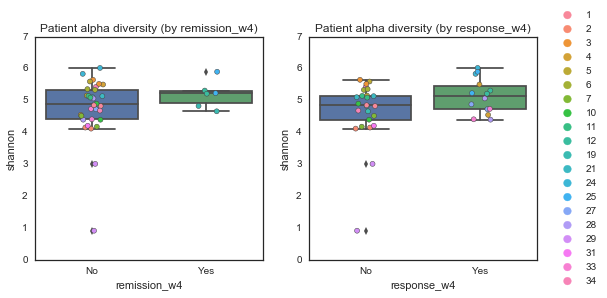

In [97]:
keep_samples = ['W2', 'W4']
data = (alphadf
            .query('sample_type == "patient"')
            .query('sample_id == @keep_samples')
        )

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

AX = ax[0]
X = 'remission_w4'
sns.boxplot(data=data, x=X, y='shannon', ax=AX)
sns.stripplot(data=data, x=X, y='shannon', 
              hue='patient_id', 
              jitter=True, linewidth=0.5, ax=AX)
AX.legend_.remove()
AX.set_title('Patient alpha diversity (by ' + X + ')')

AX = ax[1]
X = 'response_w4'
sns.boxplot(data=data, x=X, y='shannon', ax=AX)
sns.stripplot(data=data, x=X, y='shannon', 
              hue='patient_id', 
              jitter=True, linewidth=0.5, ax=AX)
AX.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
AX.set_title('Patient alpha diversity (by ' + X + ')')


The paper didn't do many comparisons between Yes/No remission (or response), so I don't have much to go off. Besides, I trust their analysis less than the Kump paper so I wouldn't put *that* much weight on them...

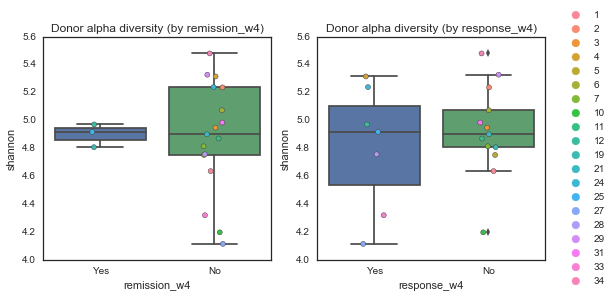

In [98]:
data = (alphadf
            .query('sample_type == "donor"')
            .query('sample_id == "donor"')
        )

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

AX = ax[0]
X = 'remission_w4'
sns.boxplot(data=data, x=X, y='shannon', ax=AX)
sns.stripplot(data=data, x=X, y='shannon', 
              hue='patient_id', 
              jitter=True, linewidth=0.5, ax=AX)
AX.legend_.remove()
AX.set_title('Donor alpha diversity (by ' + X + ')')

AX = ax[1]
X = 'response_w4'
sns.boxplot(data=data, x=X, y='shannon', ax=AX)
sns.stripplot(data=data, x=X, y='shannon', 
              hue='patient_id', 
              jitter=True, linewidth=0.5, ax=AX)
AX.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
AX.set_title('Donor alpha diversity (by ' + X + ')')


## Beta diversity

Let's make a PCA plot. In the paper, they use Bray Curtis - great, we'll do that too!

In [99]:
betares = beta_diversity('braycurtis', df.astype(int).values)
betadf = betares.to_data_frame()
betadf.index = df.index
betadf.columns = df.index

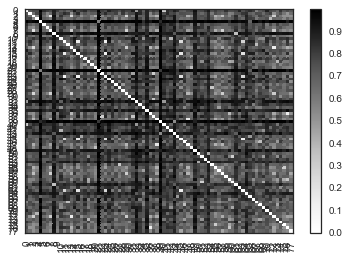

In [100]:
betares

### PCoA plot

In [102]:
ypca = PCA(random_state=12345).fit_transform(betadf.values)
ypca

array([[ 4.01061504e-01,  2.55420200e-01,  5.25535014e-01, ...,
        -8.69356775e-04, -6.39343728e-04,  1.21875307e-16],
       [-2.11936604e-01, -3.18426879e-01,  2.28086703e-01, ...,
         2.07758913e-03, -3.82540661e-04,  1.21875307e-16],
       [-1.29859241e+00, -4.05447098e-01, -3.07540640e-01, ...,
         1.42426444e-03,  4.32450146e-03,  1.21875307e-16],
       ...,
       [-8.43859840e-01,  7.86417190e-02,  1.18104279e-01, ...,
        -5.52823552e-03, -3.34527807e-03,  1.21875307e-16],
       [-6.41437044e-01, -6.63895405e-01,  2.50313351e-01, ...,
        -3.99851574e-03,  1.80043341e-03,  1.21875307e-16],
       [-9.30265692e-01,  3.07233946e-01, -1.26991623e-01, ...,
        -1.43588301e-03, -4.04239284e-03,  1.21875307e-16]])

In [104]:
def make_toplot(ypca, samples, meta):
    """
    Make a dataframe with PC columns from ypca (numpy array).
    Merge meta (dataframe) on 'sample_id' with the samples in samples (list)
    """

    dfpca = pd.DataFrame(data=ypca, 
                         index=samples, 
                         columns=['PC' + str(i) for i in range(1, ypca.shape[1]+1)])
    
    dfpca = pd.merge(dfpca, meta, left_index=True, right_on='run_accession', how='left')

    return dfpca

In [105]:
dfpca = make_toplot(ypca, df.index.tolist(), meta)

In [107]:
dfpca.shape

(78, 136)

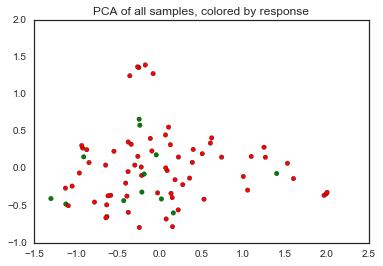

In [109]:
cdict = {'No': 'red', 'Yes': 'green'}
plt.scatter(dfpca['PC1'], dfpca['PC2'], c=[cdict[i] for i in dfpca['remission_w4']])
plt.title('PCA of all samples, colored by response')

Eh, too hard to tell what's what. Let's keep only the post-FMT samples.

In [112]:
samples = meta.query('sample_id == "W4"')['run_accession'].values.tolist()
pca_w4 = PCA(random_state=12345).fit_transform(betadf.loc[samples, samples])
dfpca_w4 = make_toplot(pca_w4, samples, meta)

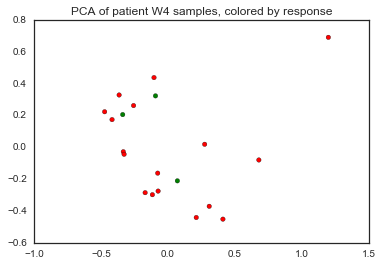

In [115]:
plt.scatter(dfpca_w4['PC1'], dfpca_w4['PC2'], c=[cdict[i] for i in dfpca_w4['remission_w4']])
plt.title('PCA of patient W4 samples, colored by response')

The authors didn't look at this, so nothing to compare to. Though the Kump data showed separation in the post-FMT samples (PCA plot including both patients and donors).

### Plot donors

Can we identify the different donor combos here?

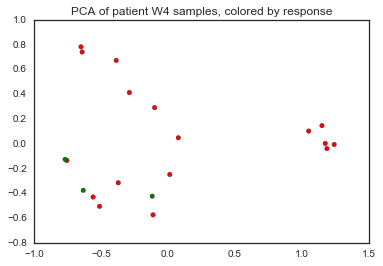

In [116]:
samples = meta.query('sample_id == "donor"')['run_accession'].values.tolist()
pca_donor = PCA(random_state=12345).fit_transform(betadf.loc[samples, samples])
dfpca_donor = make_toplot(pca_donor, samples, meta)

plt.scatter(dfpca_donor['PC1'], dfpca_donor['PC2'], c=[cdict[i] for i in dfpca_donor['remission_w4']])
plt.title('PCA of patient W4 samples, colored by response')

Nope, no clear clustering here apart from those 5 samples over on the right... Hm, I should maybe 